In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nose.tools import *

from scipy.stats import ttest_ind

import seaborn as sns
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster

# DS-Project Why People In One Country Could Be Happier Than Other 

### Introduction
There are many factors which could have influence over the happiness of the people. Our mission is observe several of these factors and to find out which of them has the main effect over the people's happiness.

The goal of this lab is to explore the data, prepare it for working, visualize it, and perform testing of hypothesis.

The original dataset is located [happiness data](https://www.kaggle.com/unsdsn/world-happiness), [air-quality data](http://aidef.apps.eea.europa.eu/?source=%7B%22query%22%3A%7B%22query_string%22%3A%7B%22query%22%3A%22Air%20quality%20annual%20statistics%22%2C%22default_operator%22%3A%22OR%22%2C%22analyze_wildcard%22%3Atrue%7D%7D%2C%22display_type%22%3A%22tabular%22%7D) and [alcohol consumption data](https://www.kaggle.com/sansuthi/alcohol-consumption). You can read the page for more information about the data and variables.

# Table of contents 
<u><ol>
    <li><a href="#1">What is happiness and why it is important to be happy</a></li>
    <li><a href="#2">What are the factors for the happiness</a></li>
    <li><a href="#3">Working with the data</a></li>
    <li><a href="#4">Conclusion</a></li>
    </ol></u>

<a id="1"></a>

## 1. What is happiness and why it is important to be happy

![Failed to load the picture](https://static.independent.co.uk/2021/05/25/17/newFile-6.jpg?width=982&height=726&auto=webp&quality=75)

Happiness is a sense of well-being, joy, or contentment. When people are successful, or safe, or lucky, they feel happiness.


We all like to have these positive feelings. Besides feeling good, positive emotions do good things for our brains and bodies. They lower stress hormones, help ease anxiety and depression, and improve our immune system. <b>Feeling some positive emotions every day has a big effect on our happiness and well-being.</b>


Happiness has also been linked to better decision-making and improved creativity. So, rather than success being the key to happiness, research shows that happiness could in fact be the key to success. But it doesn't just help us function better: <b>happiness also brings substantial benefits for society as a whole.</b>

<a id="2"></a>

# 2. What are the factors for the happiness

A research identifies five main factors that contribute to happiness: social relationships, temperament/adaptation, money, society and culture, and positive thinking styles. Happy people have strong social relationships. According to the scientists of the research, wealth actually is correlated with happiness, particularly in poorer societies. - We will test that correlation in our data <a href="#12">Testing the hypothesis</a>


[link to the research](https://www.psychologicalscience.org/observer/serious-research-on-happiness)

<a id="3"></a>

# 3. Working with the data


## Steps

In this assignment, we will go through the following steps.
<li><a href="#11">1. Read the datasets</a></li>
<li><a href="#22">2. Re-organize the datasets, perform tests on the data to see if it meets our expectations and clean the data</a></li>
<li><a href="#33">3. Explore the data to find a feature to investigate</a></li>
<li><a href="#44">4. Formulate and test a hypothesis</a></li>

<a id="11"></a>

## 1. Read the datasets

<b>First we have to read our data.</b>


For the dataset with happiness score by country we have a different '.csv' file for every year. Unfortunately the columns in each dataset are different so we have to make them equal. It will be hard to write a function doing this task, because a column for the same thing is called with different name in each dataset, so we have to clean the data by a hand.

In [3]:
happiness_by_country_2015 = pd.read_csv("2015.csv")
happiness_by_country_2015.drop('Standard Error', inplace=True, axis=1)
happiness_by_country_2015.drop('Dystopia Residual', inplace=True, axis=1)
happiness_by_country_2015.drop('Region', inplace=True, axis=1)
happiness_by_country_2015.drop('Generosity', inplace=True, axis=1)
happiness_by_country_2015['Health (Life Expectancy)'] = happiness_by_country_2015['Health (Life Expectancy)'] * 100

### <b>Description of the dataset:</b>

Happiness Rank - Rank of the country based on the Happiness Score.

Happiness Score - A metric measured in 2015 by asking the sampled people the question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."

Standard Error - The standard error of the happiness score.

Economy(GDP per capita) - The extent to which GDP contributes to the calculation of the Happiness Score.

Family - The extent to which Family contributes to the calculation of the Happiness Score

Health (life expectancy) - The extent to which Life expectancy contributed to the calculation of the Happiness Score

Freedom - The extent to which Freedom contributed to the calculation of the Happiness Score.

Trust (Government Corruption) - The extent to which Perception of Corruption contributes to Happiness Score.

In [4]:
happiness_by_country_2016 = pd.read_csv("2016.csv")
happiness_by_country_2016.drop('Lower Confidence Interval', inplace=True, axis=1)
happiness_by_country_2016.drop('Upper Confidence Interval', inplace=True, axis=1)
happiness_by_country_2016.drop('Dystopia Residual', inplace=True, axis=1)
happiness_by_country_2016.drop('Region', inplace=True, axis=1)
happiness_by_country_2016.drop('Generosity', inplace=True, axis=1)
happiness_by_country_2016['Health (Life Expectancy)'] = happiness_by_country_2016['Health (Life Expectancy)'] * 100

In [5]:
happiness_by_country_2017 = pd.read_csv("2017.csv")
happiness_by_country_2017.drop('Whisker.high', inplace=True, axis=1)
happiness_by_country_2017.drop('Whisker.low', inplace=True, axis=1)
happiness_by_country_2017.drop('Dystopia.Residual', inplace=True, axis=1)
happiness_by_country_2017.columns = ['Country', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity']
happiness_by_country_2017['Health (Life Expectancy)'] = happiness_by_country_2017['Health (Life Expectancy)'] * 100
happiness_by_country_2017.drop('Generosity', inplace=True, axis=1)

In [6]:
happiness_by_country_2018 = pd.read_csv("2018.csv")
happiness_by_country_2018.columns = ['Happiness Rank', 'Country', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Generosity', 'Trust (Government Corruption)']
happiness_by_country_2018['Health (Life Expectancy)'] = happiness_by_country_2018['Health (Life Expectancy)'] * 100
happiness_by_country_2018.drop('Generosity', inplace=True, axis=1)

In [7]:
happiness_by_country_2019 = pd.read_csv("2019.csv")
happiness_by_country_2019.columns
happiness_by_country_2019.columns = ['Happiness Rank', 'Country', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Generosity', 'Trust (Government Corruption)']
happiness_by_country_2019['Health (Life Expectancy)'] = happiness_by_country_2019['Health (Life Expectancy)'] * 100
happiness_by_country_2019.drop('Generosity', inplace=True, axis=1)

In order to have more features that we can observe, we want to include some more dataframes. In that case we will include dataframe with air-quality value of every country and a dataframe with alcohol consumption. We have to clean and order the data from both dataframes.

Now we will read the dataframe with the air-quality values.

In [8]:
new_dataset = pd.read_csv('data.csv')

 Now let's read the last dataset that contains information about the alcohol consumption by countries

In [9]:
dataset_with_alcohol_consumption_by_country = pd.read_csv("gapminder_alcohol.csv")

### Description of  the dataset:

country: Unique Identifier


incomeperperson: Gross Domestic Product per capita in constant 2000 US$. The inflation but not the differences in the cost of living between countries has been taken into account.


alcconsumption: Alcohol consumption per adult (age 15+), litres Recorded and estimated average alcohol consumption, adult (15+) per capita consumption in litres pure alcohol


suicideper100TH: Suicide, age adjusted, per 100 000 Mortality due to self-inflicted injury, per 100 000 standard population, age adjusted


employrate: Total employees age 15+ (% of population) Percentage of total population, age above 15, that has been employed during the given year.


urbanrate: Urban population (% of total) Urban population refers to people living in urban areas as defined by national statistical offices (calculated using World Bank population estimates and urban ratios from the United Nations World Urbanization Prospects)

<a id="22"></a>

## 2. Re-organize the datasets, perform tests on the data to see if it meets our expectations and clean the data

Let's start with the first read dataset - that with the countries and the happiness score by every year in the period 2015-2019

Now we have the data for each year, but we have to put all the data in one table.

First create a column for storing the year of the observation, because when we merge the tables this information will be loosen.

In [10]:
def create_column_with_years(df, year):
    df["year"] = year
create_column_with_years(happiness_by_country_2015, 2015)
create_column_with_years(happiness_by_country_2016, 2016)
create_column_with_years(happiness_by_country_2017, 2017)
create_column_with_years(happiness_by_country_2018, 2018)
create_column_with_years(happiness_by_country_2019, 2019)

Next step is to concatenate the tables in one big table:

In [11]:
frames = [happiness_by_country_2015, happiness_by_country_2016, happiness_by_country_2017, happiness_by_country_2018, happiness_by_country_2019]
from_2015_to_2021_df = pd.concat(frames)
from_2015_to_2021_df

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),year
0,Switzerland,1,7.587,1.39651,1.34951,94.143,0.66557,0.41978,2015
1,Iceland,2,7.561,1.30232,1.40223,94.784,0.62877,0.14145,2015
2,Denmark,3,7.527,1.32548,1.36058,87.464,0.64938,0.48357,2015
3,Norway,4,7.522,1.45900,1.33095,88.521,0.66973,0.36503,2015
4,Canada,5,7.427,1.32629,1.32261,90.563,0.63297,0.32957,2015
...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,3.334,0.35900,0.71100,61.400,0.55500,0.41100,2019
152,Tanzania,153,3.231,0.47600,0.88500,49.900,0.41700,0.14700,2019
153,Afghanistan,154,3.203,0.35000,0.51700,36.100,0.00000,0.02500,2019
154,Central African Republic,155,3.083,0.02600,0.00000,10.500,0.22500,0.03500,2019


We must check if we have None-s in the data:

In [12]:
from_2015_to_2021_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        782 non-null    object 
 1   Happiness Rank                 782 non-null    int64  
 2   Happiness Score                782 non-null    float64
 3   Economy (GDP per Capita)       782 non-null    float64
 4   Family                         782 non-null    float64
 5   Health (Life Expectancy)       782 non-null    float64
 6   Freedom                        782 non-null    float64
 7   Trust (Government Corruption)  781 non-null    float64
 8   year                           782 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 61.1+ KB


We found that in column 'Trust (Government Corruption)' there is a null value so we should think what to do with it. 

In [13]:
from_2015_to_2021_df[from_2015_to_2021_df["Trust (Government Corruption)"].isna() == True]

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),year
19,United Arab Emirates,20,6.774,2.096,0.776,67.0,0.284,NaN,2018


We found that the null value of the column is for the United Arab Emirates in 2018. We could fill with the mean value of 2019 and 2017 and that's what we are going to do, because we don't want to delete the row and loose information.

In [14]:
from_2015_to_2021_df[from_2015_to_2021_df["Country"] == "United Arab Emirates"]

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),year
19,United Arab Emirates,20,6.901,1.427270,1.12575,80.925000,0.641570,0.385830,2015
27,United Arab Emirates,28,6.573,1.573520,0.87114,72.993000,0.562150,0.355610,2016
20,United Arab Emirates,21,6.648,1.626343,1.26641,72.679824,0.608345,0.360942,2017
19,United Arab Emirates,20,6.774,2.096000,0.77600,67.000000,0.284000,NaN,2018
20,United Arab Emirates,21,6.825,1.503000,1.31000,82.500000,0.598000,0.182000,2019


In [15]:
sum = from_2015_to_2021_df[ (from_2015_to_2021_df["Country"] == "United Arab Emirates") & (from_2015_to_2021_df["year"] == 2017)]['Trust (Government Corruption)'].values[0]
sum += from_2015_to_2021_df[(from_2015_to_2021_df["Country"] == "United Arab Emirates") & (from_2015_to_2021_df["year"] == 2019)]['Trust (Government Corruption)'].values[0]
sum /= 2
from_2015_to_2021_df['Trust (Government Corruption)'].fillna(sum ,inplace=True)

In [16]:
from_2015_to_2021_df[from_2015_to_2021_df["Country"] == "United Arab Emirates"]

,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),year
19,United Arab Emirates,20,6.901,1.427270,1.12575,80.925000,0.641570,0.385830,2015
27,United Arab Emirates,28,6.573,1.573520,0.87114,72.993000,0.562150,0.355610,2016
20,United Arab Emirates,21,6.648,1.626343,1.26641,72.679824,0.608345,0.360942,2017
19,United Arab Emirates,20,6.774,2.096000,0.77600,67.000000,0.284000,0.271471,2018
20,United Arab Emirates,21,6.825,1.503000,1.31000,82.500000,0.598000,0.182000,2019


We will set as an index for the table the "Happiness rank" column, but before that we will sort the table by 'happiness score' in descending order. Then we will set the hapiness rank column as an index

In [17]:
def reset_index(df, new_name_of_index_column:str):
    df.reset_index(inplace=True, drop=True)
    if new_name_of_index_column in df.columns:
        df.drop(new_name_of_index_column,inplace=True, axis = 1)
    df.index += 1
    df.index.name = new_name_of_index_column

In [18]:
from_2015_to_2021_df.sort_values(by = ['Happiness Score'], axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last', key=None)
reset_index(from_2015_to_2021_df, "Happiness Rank")
from_2015_to_2021_df

,Country,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),year
Happiness Rank,,,,,,,,
1,Finland,7.769,1.340000,1.587000,98.600000,0.596000,0.393000,2019
2,Finland,7.632,1.305000,1.592000,87.400000,0.681000,0.393000,2018
3,Denmark,7.600,1.383000,1.573000,99.600000,0.592000,0.410000,2019
4,Norway,7.594,1.456000,1.582000,86.100000,0.686000,0.340000,2018
5,Switzerland,7.587,1.396510,1.349510,94.143000,0.665570,0.419780,2015
...,...,...,...,...,...,...,...,...
778,Burundi,2.905,0.068310,0.234420,15.747000,0.043200,0.094190,2016
779,Burundi,2.905,0.091623,0.629794,15.161079,0.059901,0.204435,2017
780,South Sudan,2.853,0.306000,0.575000,29.500000,0.010000,0.091000,2019


<b>Now let's do the simillar steps to the second dataset:</b>

In [19]:
new_dataset.describe

<bound method NDFrame.describe of                    CountryOrTerritory  ReportingYear  \
0                           Gibraltar           2013   
1                           Gibraltar           2013   
2                           Gibraltar           2013   
3                           Gibraltar           2014   
4                           Gibraltar           2014   
...                               ...            ...   
1060897  Kosovo (under UNSCR 1244/99)           2018   
1060898  Kosovo (under UNSCR 1244/99)           2018   
1060899  Kosovo (under UNSCR 1244/99)           2018   
1060900                       Austria           2015   
1060901                       Austria           2015   

                          UpdateTime       StationLocalId  \
0        2020-07-31T07:42:16.256666Z  GIB_Station_GB0050A   
1        2020-07-31T07:42:16.256666Z  GIB_Station_GB0051A   
2        2020-07-31T07:42:16.256666Z  GIB_Station_GB0050A   
3            2019-03-20T09:18:12.92Z  GIB_Station

In [20]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1060902 entries, 0 to 1060901
Data columns (total 19 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   CountryOrTerritory       1060902 non-null  object 
 1   ReportingYear            1060902 non-null  int64  
 2   UpdateTime               1060902 non-null  object 
 3   StationLocalId           1060902 non-null  object 
 4   SamplingPointLocalId     1060902 non-null  object 
 5   SamplingPoint_Latitude   1060902 non-null  float64
 6   SamplingPoint_Longitude  1060902 non-null  float64
 7   Pollutant                1060902 non-null  object 
 8   AggregationType          1060902 non-null  object 
 9   Namespace                1060902 non-null  object 
 10  Unit                     1060902 non-null  object 
 11  BeginPosition            1060902 non-null  object 
 12  EndPosition              1060902 non-null  object 
 13  Validity                 1060902 non-null 

We have to take the columns that are interesting for our study, so we will take only - 'CountryOrTerritory', 'ReportingYear' and 'AQValue'.

In [21]:
new_dataset_filtered = new_dataset[['CountryOrTerritory','ReportingYear','AQValue']]

We want to have one value for air-quality for each year, so in order to do that we will take the mean value of all observations in one year. 

In [22]:
result_AQValue_df = new_dataset_filtered.groupby(["CountryOrTerritory","ReportingYear"], as_index = False)["AQValue"].mean()
result_AQValue_df

,CountryOrTerritory,ReportingYear,AQValue
0,Albania,2011,72838.323082
1,Albania,2012,36420.111541
2,Albania,2013,19092.159250
3,Albania,2014,1610.197031
4,Albania,2015,1082.209315
...,...,...,...
360,United Kingdom,2015,238.685470
361,United Kingdom,2016,321.948099
362,United Kingdom,2017,299.533952
363,United Kingdom,2018,331.476312


In the dataset we can see that "Kosovo" has strange name - "Kosovo (under UNSCR 1244/99)", we would like to rename it.

In [23]:
result_AQValue_df["CountryOrTerritory"].replace("Kosovo (under UNSCR 1244/99)", "Kosovo", inplace = True)

Then we will rename the features of the dataset too.

In [24]:
result_AQValue_df.columns = ["Country","year","AQValue"]
result_AQValue_df[result_AQValue_df["Country"] == "Kosovo"]

,Country,year,AQValue
185,Kosovo,2011,57.954738
186,Kosovo,2012,58.773939
187,Kosovo,2013,15770.931909
188,Kosovo,2014,23351.796887
189,Kosovo,2015,3038.142048
190,Kosovo,2016,5048.175811
191,Kosovo,2017,346.447529
192,Kosovo,2018,1341.078129
193,Kosovo,2019,164.538785


Now we have the observations on each country for the period 2011-2019. But our main dataset include only the period between 2015-2019, so we will filter the rows.

In [25]:
result_AQValue_df = result_AQValue_df[result_AQValue_df["year"] >= 2015]
result_AQValue_df[result_AQValue_df["Country"] == "Kosovo"]

,Country,year,AQValue
189,Kosovo,2015,3038.142048
190,Kosovo,2016,5048.175811
191,Kosovo,2017,346.447529
192,Kosovo,2018,1341.078129
193,Kosovo,2019,164.538785


Now it is time to merge the two datasets into one and that will save observation if both datasets has the name and year of this country.

In [26]:
AQValue_and_happiness_df = pd.merge(result_AQValue_df, from_2015_to_2021_df)
AQValue_and_happiness_df[AQValue_and_happiness_df["Country"] == "Bulgaria"]

,Country,year,AQValue,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption)
20,Bulgaria,2015,750.925714,4.218,1.012160,1.106140,76.649000,0.305870,0.008720
21,Bulgaria,2016,570.671862,4.217,1.113060,0.925420,67.806000,0.212190,0.006150
22,Bulgaria,2017,560.058555,4.714,1.161459,1.434379,70.821768,0.289232,0.113178
23,Bulgaria,2018,495.693208,4.933,1.054000,1.515000,71.200000,0.359000,0.009000
24,Bulgaria,2019,214.874952,5.011,1.092000,1.513000,81.500000,0.311000,0.004000


We have to set up the indexes, again.

In [27]:
AQValue_and_happiness_df.sort_values(by = ['Happiness Score'], axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last', key=None)
reset_index(AQValue_and_happiness_df, "Happiness Rank")
AQValue_and_happiness_df

,Country,year,AQValue,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption)
Happiness Rank,,,,,,,,,
1,Finland,2019,146.887879,7.769,1.340000,1.587000,98.600000,0.59600,0.393000
2,Finland,2018,455.536366,7.632,1.305000,1.592000,87.400000,0.68100,0.393000
3,Denmark,2019,242.051139,7.600,1.383000,1.573000,99.600000,0.59200,0.410000
4,Norway,2018,316.289536,7.594,1.456000,1.582000,86.100000,0.68600,0.340000
5,Switzerland,2015,3372.066520,7.587,1.396510,1.349510,94.143000,0.66557,0.419780
...,...,...,...,...,...,...,...,...,...
182,Georgia,2015,28182.499919,4.297,0.741900,0.385620,72.926000,0.40577,0.383310
183,Georgia,2017,7995.112309,4.286,0.950613,0.570615,64.954698,0.30941,0.054009
184,Georgia,2016,27162.194262,4.252,0.837920,0.192490,64.035000,0.32461,0.318800


<b>Now let's do the simillar steps to the third dataset:</b>

In [28]:
dataset_with_alcohol_consumption_by_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          213 non-null    object 
 1   alcconsumption   187 non-null    float64
 2   incomeperperson  190 non-null    float64
 3   suicideper100th  191 non-null    float64
 4   employrate       178 non-null    float64
 5   urbanrate        203 non-null    float64
dtypes: float64(5), object(1)
memory usage: 10.1+ KB


This dataset has many more problems compared with the previous two. We have to clear it and order the data.

The column called "employrate" has 35 empty observations. But we have only "Serbia" as a country in the common dataset so we can drop all other countries. Then we have to fill the information for Serbia and we will do this searching on Google ->

"Employment Rate in Serbia averaged 43.89 percent from 2008 until 2021, reaching an all time high of 49.90 percent in the third quarter of 2020 and a record low of 34.30 percent in the first quarter of 2012"

In [29]:
df_drop = dataset_with_alcohol_consumption_by_country[(dataset_with_alcohol_consumption_by_country["employrate"].isna()) & (dataset_with_alcohol_consumption_by_country["country"] != "Serbia")]
dataset_with_alcohol_consumption_by_country.drop(df_drop.index, inplace = True)
dataset_with_alcohol_consumption_by_country["employrate"].fillna(43.89,inplace = True)
dataset_with_alcohol_consumption_by_country[dataset_with_alcohol_consumption_by_country["country"] == "Serbia"]

,country,alcconsumption,incomeperperson,suicideper100th,employrate,urbanrate
169,Serbia,12.21,1194.711433,13.71634,43.89,52.04


In [30]:
dataset_with_alcohol_consumption_by_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 212
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          179 non-null    object 
 1   alcconsumption   167 non-null    float64
 2   incomeperperson  167 non-null    float64
 3   suicideper100th  170 non-null    float64
 4   employrate       179 non-null    float64
 5   urbanrate        174 non-null    float64
dtypes: float64(5), object(1)
memory usage: 9.8+ KB


In [31]:
dataset_with_alcohol_consumption_by_country[dataset_with_alcohol_consumption_by_country["alcconsumption"].isna()]

,country,alcconsumption,incomeperperson,suicideper100th,employrate,urbanrate
75,Guadeloupe,NaN,NaN,NaN,43.099998,NaN
83,"Hong Kong, China",NaN,35536.072470,NaN,59.000000,100.00
99,"Korea, Dem. Rep.",NaN,NaN,4.735673,64.599998,62.68
112,"Macao, China",NaN,33923.313870,NaN,63.599998,100.00
117,Maldives,NaN,4038.857818,22.353479,56.900002,37.86
121,Martinique,NaN,NaN,NaN,42.500000,NaN
137,Netherlands Antilles,NaN,NaN,NaN,53.500000,92.68
155,Puerto Rico,NaN,15822.112140,NaN,42.400002,98.32
157,Reunion,NaN,NaN,NaN,44.200001,NaN
170,Serbia and Montenegro,NaN,NaN,14.469648,48.700001,NaN


While almost every "country" of those with null values in "alcconsumption" column are missing from the common table, we can delete them.

In [32]:
list_for_drop = dataset_with_alcohol_consumption_by_country[dataset_with_alcohol_consumption_by_country["alcconsumption"].isna()]
dataset_with_alcohol_consumption_by_country.drop(list_for_drop.index, inplace = True)
dataset_with_alcohol_consumption_by_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 212
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          167 non-null    object 
 1   alcconsumption   167 non-null    float64
 2   incomeperperson  163 non-null    float64
 3   suicideper100th  167 non-null    float64
 4   employrate       167 non-null    float64
 5   urbanrate        167 non-null    float64
dtypes: float64(5), object(1)
memory usage: 9.1+ KB


We have one more column( 'incomeperperson' ) with null values, so let's see what can we do there.

In [33]:
dataset_with_alcohol_consumption_by_country[dataset_with_alcohol_consumption_by_country["incomeperperson"].isna()]

,country,alcconsumption,incomeperperson,suicideper100th,employrate,urbanrate
0,Afghanistan,0.03,NaN,6.684385,55.700001,24.04
101,Kuwait,0.10,NaN,1.498057,65.699997,98.36
132,Myanmar,0.58,NaN,10.114997,74.699997,32.58
177,Somalia,0.50,NaN,29.864164,66.000000,36.52


Again we have none of these countries in the common table so we can delete them.

Now, let's try to merge one more time the tables. In order to do that we have to rename the columns of the alcohol-consumption dataset.

In [34]:
dataset_with_alcohol_consumption_by_country.columns = ["Country", "alcohol_consumption", "income_per_person", "suicide_rate_per_100","employ_rate","urban_rate"]

In [35]:
alcohol_consumption_AQValue_and_happiness_df = pd.merge(AQValue_and_happiness_df, dataset_with_alcohol_consumption_by_country)

In [36]:
reset_index(alcohol_consumption_AQValue_and_happiness_df, "Happiness Rank")
alcohol_consumption_AQValue_and_happiness_df

,Country,year,AQValue,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),alcohol_consumption,income_per_person,suicide_rate_per_100,employ_rate,urban_rate
Happiness Rank,,,,,,,,,,,,,,
1,Finland,2019,146.887879,7.769,1.340000,1.587000,98.600000,0.596000,0.393000,13.10,27110.731590,16.23437,57.200001,63.30
2,Finland,2018,455.536366,7.632,1.305000,1.592000,87.400000,0.681000,0.393000,13.10,27110.731590,16.23437,57.200001,63.30
3,Finland,2017,168.748344,7.469,1.443572,1.540247,80.915767,0.617951,0.245483,13.10,27110.731590,16.23437,57.200001,63.30
4,Finland,2016,287.209049,7.413,1.405980,1.134640,81.091000,0.571040,0.410040,13.10,27110.731590,16.23437,57.200001,63.30
5,Finland,2015,330.986899,7.406,1.290250,1.318260,88.911000,0.641690,0.413720,13.10,27110.731590,16.23437,57.200001,63.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Georgia,2019,229.465868,4.519,0.886000,0.666000,75.200000,0.346000,0.164000,6.66,1258.762596,1.57435,55.599998,52.74
167,Georgia,2018,0.214286,4.340,0.853000,0.592000,64.300000,0.375000,0.215000,6.66,1258.762596,1.57435,55.599998,52.74
168,Georgia,2015,28182.499919,4.297,0.741900,0.385620,72.926000,0.405770,0.383310,6.66,1258.762596,1.57435,55.599998,52.74


Unfortunately, the values from the new dataset fixed by the period of time (2015-2019), but however, we will try to extract something intresting.

In [37]:
alcohol_consumption_AQValue_and_happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 1 to 170
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        170 non-null    object 
 1   year                           170 non-null    int64  
 2   AQValue                        170 non-null    float64
 3   Happiness Score                170 non-null    float64
 4   Economy (GDP per Capita)       170 non-null    float64
 5   Family                         170 non-null    float64
 6   Health (Life Expectancy)       170 non-null    float64
 7   Freedom                        170 non-null    float64
 8   Trust (Government Corruption)  170 non-null    float64
 9   alcohol_consumption            170 non-null    float64
 10  income_per_person              170 non-null    float64
 11  suicide_rate_per_100           170 non-null    float64
 12  employ_rate                    170 non-null    flo

Finally we have valid values and ordered dataset, so we can continue with experimenting with the columns.

In [38]:
alcohol_consumption_AQValue_and_happiness_df[alcohol_consumption_AQValue_and_happiness_df["Country"] == "Bulgaria"]

,Country,year,AQValue,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),alcohol_consumption,income_per_person,suicide_rate_per_100,employ_rate,urban_rate
Happiness Rank,,,,,,,,,,,,,,
156,Bulgaria,2019,214.874952,5.011,1.092000,1.513000,81.500000,0.311000,0.004000,11.4,2549.558474,9.216544,47.299999,71.1
157,Bulgaria,2018,495.693208,4.933,1.054000,1.515000,71.200000,0.359000,0.009000,11.4,2549.558474,9.216544,47.299999,71.1
158,Bulgaria,2017,560.058555,4.714,1.161459,1.434379,70.821768,0.289232,0.113178,11.4,2549.558474,9.216544,47.299999,71.1
159,Bulgaria,2015,750.925714,4.218,1.012160,1.106140,76.649000,0.305870,0.008720,11.4,2549.558474,9.216544,47.299999,71.1
160,Bulgaria,2016,570.671862,4.217,1.113060,0.925420,67.806000,0.212190,0.006150,11.4,2549.558474,9.216544,47.299999,71.1


<a id="33"></a>


## 3. Explore the data to find a feature to investigate



We can observe the range of the "Happiness Score" column

In [39]:
alcohol_consumption_AQValue_and_happiness_df["Happiness Score"].min(),alcohol_consumption_AQValue_and_happiness_df["Happiness Score"].max()

(4.217, 7.769)

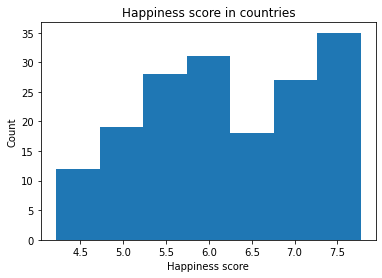

In [40]:
plt.hist(alcohol_consumption_AQValue_and_happiness_df["Happiness Score"], bins = "fd")

plt.title("Happiness score in countries")
plt.xlabel("Happiness score")
plt.ylabel("Count")
plt.show()

This looks like a binomial distribution. Let's find a treshold and separete the data into two subsets - happy_people, unhappy_people

In [41]:
alcohol_consumption_AQValue_and_happiness_df["Happiness Score"].skew()

-0.12959762711400252

In [42]:
mean_value = alcohol_consumption_AQValue_and_happiness_df['Happiness Score'].mean()
mean_value

6.20505882577335

In [43]:
median_value = np.median(alcohol_consumption_AQValue_and_happiness_df['Happiness Score'])
median_value

6.094

Here as out distribution has little skew we can use both the mean or the median of it. In that case we will use the median. 

In [44]:
happy_people = alcohol_consumption_AQValue_and_happiness_df[alcohol_consumption_AQValue_and_happiness_df['Happiness Score'] > median_value]

In [45]:
unhappy_people = alcohol_consumption_AQValue_and_happiness_df[alcohol_consumption_AQValue_and_happiness_df['Happiness Score'] <= median_value]

In [46]:
len(happy_people),len(unhappy_people)

(85, 85)

We can see that we had perfectly separated the countries into two groups using the median as a threshold.

In [47]:
def plot_histograms(dataset,column,name_y,title):
    plt.hist(dataset[column], bins = "fd")

    plt.title(title)
    plt.xlabel(column)
    plt.ylabel(name_y)
    plt.show()

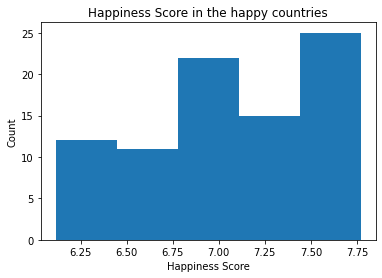

In [48]:
plot_histograms(happy_people,"Happiness Score","Count","Happiness Score in the happy countries")

In [49]:
happy_people["Happiness Score"].skew()

-0.46102897231670914

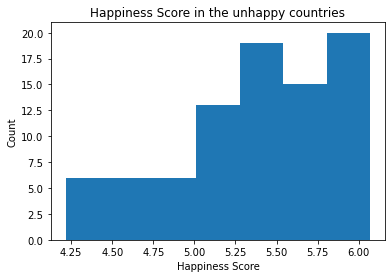

In [50]:
plot_histograms(unhappy_people,"Happiness Score","Count","Happiness Score in the unhappy countries")

In [51]:
unhappy_people["Happiness Score"].skew()

-0.6991846279983804

Let's see the distributions of the "AQValue" columns

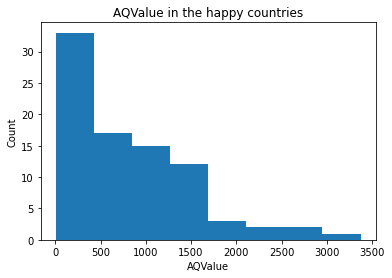

In [52]:
plot_histograms(happy_people,"AQValue","Count","AQValue in the happy countries")

In [53]:
happy_people["AQValue"].skew()

1.278622674320489

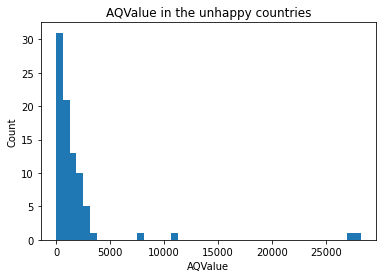

In [54]:
plot_histograms(unhappy_people,"AQValue","Count","AQValue in the unhappy countries")

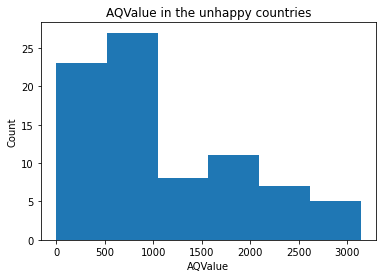

In [55]:
plot_histograms(unhappy_people[unhappy_people["AQValue"] <= 5000],"AQValue","Count","AQValue in the unhappy countries")

In [56]:
unhappy_people["AQValue"].skew()

5.3506091373262885

In [57]:
unhappy_people.corr()

,year,AQValue,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),alcohol_consumption,income_per_person,suicide_rate_per_100,employ_rate,urban_rate
year,1.000000,-0.255373,0.193144,0.055266,0.449671,0.252195,0.098127,-0.038498,-0.038733,-0.055494,-0.056811,-0.003182,-0.006384
AQValue,-0.255373,1.000000,-0.367743,-0.421231,-0.497943,-0.086569,-0.041796,0.441528,-0.264031,-0.097845,-0.260021,0.085635,-0.217956
Happiness Score,0.193144,-0.367743,1.000000,0.682467,0.607694,0.248782,0.233528,-0.170265,0.429017,0.466145,0.394632,0.105884,0.287165
Economy (GDP per Capita),0.055266,-0.421231,0.682467,1.000000,0.536589,0.204017,0.158057,-0.111296,0.416621,0.699687,0.225929,0.295259,0.586956
Family,0.449671,-0.497943,0.607694,0.536589,1.000000,0.226478,0.240521,-0.196725,0.395312,0.253386,0.392655,-0.006923,0.430403
Health (Life Expectancy),0.252195,-0.086569,0.248782,0.204017,0.226478,1.000000,0.116695,-0.274485,-0.048904,0.655344,-0.336034,0.200784,0.029801
Freedom,0.098127,-0.041796,0.233528,0.158057,0.240521,0.116695,1.000000,0.155935,0.283233,0.084427,0.078247,0.569291,-0.108250
Trust (Government Corruption),-0.038498,0.441528,-0.170265,-0.111296,-0.196725,-0.274485,0.155935,1.000000,-0.217373,-0.115003,-0.173538,0.169972,-0.071176
alcohol_consumption,-0.038733,-0.264031,0.429017,0.416621,0.395312,-0.048904,0.283233,-0.217373,1.000000,0.033206,0.715118,0.246090,0.103172
income_per_person,-0.055494,-0.097845,0.466145,0.699687,0.253386,0.655344,0.084427,-0.115003,0.033206,1.000000,-0.223631,0.325556,0.344667


In [58]:
happy_people.corr()

,year,AQValue,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),alcohol_consumption,income_per_person,suicide_rate_per_100,employ_rate,urban_rate
year,1.000000,-0.283851,-0.069039,-0.072556,0.695128,0.498324,-0.283628,-0.204480,0.075805,-0.126436,0.108927,-0.073682,-0.116792
AQValue,-0.283851,1.000000,-0.218785,-0.017623,-0.225866,-0.040316,0.060710,-0.106611,0.042052,-0.024955,-0.001355,-0.299102,-0.175070
Happiness Score,-0.069039,-0.218785,1.000000,0.403187,0.112054,-0.008368,0.673285,0.632989,-0.168003,0.638453,0.056000,0.764411,0.101402
Economy (GDP per Capita),-0.072556,-0.017623,0.403187,1.000000,-0.109345,-0.273097,0.240517,0.509513,0.057024,0.775002,0.051966,0.300560,0.004762
Family,0.695128,-0.225866,0.112054,-0.109345,1.000000,0.401760,0.113878,-0.006621,-0.002728,-0.025981,0.051443,0.143854,-0.076771
Health (Life Expectancy),0.498324,-0.040316,-0.008368,-0.273097,0.401760,1.000000,-0.217114,-0.251758,-0.044343,0.033265,-0.086226,0.005310,0.001033
Freedom,-0.283628,0.060710,0.673285,0.240517,0.113878,-0.217114,1.000000,0.572624,-0.269959,0.467743,-0.001190,0.476076,0.091696
Trust (Government Corruption),-0.204480,-0.106611,0.632989,0.509513,-0.006621,-0.251758,0.572624,1.000000,-0.037591,0.522017,-0.065877,0.372717,0.083823
alcohol_consumption,0.075805,0.042052,-0.168003,0.057024,-0.002728,-0.044343,-0.269959,-0.037591,1.000000,0.051536,0.411966,-0.093159,-0.639612
income_per_person,-0.126436,-0.024955,0.638453,0.775002,-0.025981,0.033265,0.467743,0.522017,0.051536,1.000000,0.075678,0.530146,0.109511


We can see there are differences in the strongly correlated to "Happiness Score" columns, amid the "unhappy countries" the columns - ("Economy (GDP per Capita)", "Family", "income_per_person") are most correlataed with the happiness score. In comparison to this through the "happy countries" most correlated to happiness score columns are ("Trust (Government Corruption)", "Freedom", "employ_rate", "income_per_person")

<AxesSubplot:xlabel='alcohol_consumption', ylabel='Happiness Score'>

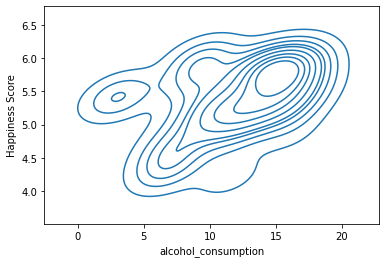

In [59]:
sns.kdeplot(data=unhappy_people, x="alcohol_consumption", y="Happiness Score")

<AxesSubplot:xlabel='Trust (Government Corruption)', ylabel='Happiness Score'>

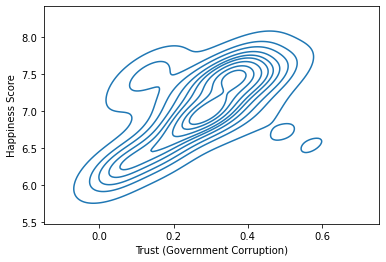

In [60]:
sns.kdeplot(data=happy_people, x="Trust (Government Corruption)", y="Happiness Score")

We can see that when the column have greater correlation on each other their "kdeplot" looks more like a linear function.

Now we want to plot the countries on the map of Europe so we can easily check for example their happiness score clicking by the country name. In order to do the task we have to find the longtitude and latitude for each country. This could be done with the library "geopy".

In [61]:
geolocator = Nominatim( user_agent = "DS-Project Why People In One Country Could Be Happier Than Other")
def geolocate(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return (loc.latitude, loc.longitude)
    except:
        # Return missing value
        return np.nan

In [62]:
list_of_countries = alcohol_consumption_AQValue_and_happiness_df["Country"].tolist()

In [63]:
longtitude = []
latitude = []

result = geolocate(list_of_countries[0])
latitude.append(result[0])
longtitude.append(result[1])

for index in range(1, len(list_of_countries)):
    # for each country find the coordinates and append them to separeted lists for longitude and latitude, so we can easily
    # add the lists as a columns to the dataframe
    if list_of_countries[index] == list_of_countries[index-1]:
        latitude.append(result[0])
        longtitude.append(result[1])
    else:
        result = geolocate(list_of_countries[index])
        latitude.append(result[0])
        longtitude.append(result[1])

In [64]:
alcohol_consumption_AQValue_and_happiness_df["Latitude"] = latitude
alcohol_consumption_AQValue_and_happiness_df["Longitude"] = longtitude

Here we have problems with "Georgia" because the library thinks that should be the American state called with the same name. So we have to find the coordinates alone and to fix the problem.

In [65]:
result = geolocate("Georgia")
result

(32.3293809, -83.1137366)

In [66]:
alcohol_consumption_AQValue_and_happiness_df["Latitude"].replace(32.3293809,42.3154, inplace=True)
alcohol_consumption_AQValue_and_happiness_df["Longitude"].replace(-83.1137366,43.3569, inplace=True)

And the time for plotting the countries on the map is now.

In [67]:
world_map= folium.Map(tiles="cartodbpositron",location=[54.5260, 15.2551], zoom_start=3)
marker_cluster = MarkerCluster().add_to(world_map)

for i in range(len(alcohol_consumption_AQValue_and_happiness_df)):
        lat = alcohol_consumption_AQValue_and_happiness_df.iloc[i]['Latitude']
        long = alcohol_consumption_AQValue_and_happiness_df.iloc[i]['Longitude']
        radius = 7
        popup_text = """Country : {}<br>
                    Happiness Score : {}<br>
                    Year : {}<br>"""
        popup_text = popup_text.format(alcohol_consumption_AQValue_and_happiness_df.iloc[i]['Country'],
                                   alcohol_consumption_AQValue_and_happiness_df.iloc[i]['Happiness Score'],
                                       alcohol_consumption_AQValue_and_happiness_df.iloc[i]['year']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill = True).add_to(marker_cluster)
world_map

<a id="44"></a>

## 4. Formulate and test a hypothesis

We can add a column for the region of the country so then we can group the data by region search for something interesting. So let's make the groups.

In [68]:
Northern_Europe = ["Denmark", "Finland", "Iceland", "Norway", "Sweden"]
Western_Europe = ["Belgium", "France", "Liechtenstein", "Monaco", "Netherlands","United Kingdom","Ireland"]
Central_Europe = ["Croatia", "Czech Republic", "Hungary", "Poland", "Slovakia", "Slovenia", "Germany", "Luxembourg", "Switzerland","Austria"]
Southwest_Europe = ["Spain","Portugal"]
Southern_Europe = ["Greece","Italy","Malta"]
Southeast_Europe = ["Bulgaria","Albania","Bosnia and Herzegovina", "Kosovo", "Montenegro", "North Macedonia", "Romania","Serbia","Turkey", "Cyprus"]
Eastern_Europe = ["Lithuania", "Latvia", "Estonia","Georgia"]

In [69]:
def get_region(country):
    if country in Northern_Europe:
        return "Northern_Europe"
    elif country in Western_Europe:
        return "Western_Europe"
    elif country in Central_Europe:
        return "Central_Europe"
    elif country in Southwest_Europe:
        return "Southwest_Europe"
    elif country in Southern_Europe:
        return "Southern_Europe"
    elif country in Southeast_Europe:
        return "Southeast_Europe"
    elif country in Eastern_Europe:
        return "Eastern_Europe"
    else:
        return "other"

In [70]:
alcohol_consumption_AQValue_and_happiness_df['Region'] = alcohol_consumption_AQValue_and_happiness_df['Country'].apply(lambda x: get_region(x))
alcohol_consumption_AQValue_and_happiness_df

,Country,year,AQValue,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),alcohol_consumption,income_per_person,suicide_rate_per_100,employ_rate,urban_rate,Latitude,Longitude,Region
Happiness Rank,,,,,,,,,,,,,,,,,
1,Finland,2019,146.887879,7.769,1.340000,1.587000,98.600000,0.596000,0.393000,13.10,27110.731590,16.23437,57.200001,63.30,63.246778,25.920916,Northern_Europe
2,Finland,2018,455.536366,7.632,1.305000,1.592000,87.400000,0.681000,0.393000,13.10,27110.731590,16.23437,57.200001,63.30,63.246778,25.920916,Northern_Europe
3,Finland,2017,168.748344,7.469,1.443572,1.540247,80.915767,0.617951,0.245483,13.10,27110.731590,16.23437,57.200001,63.30,63.246778,25.920916,Northern_Europe
4,Finland,2016,287.209049,7.413,1.405980,1.134640,81.091000,0.571040,0.410040,13.10,27110.731590,16.23437,57.200001,63.30,63.246778,25.920916,Northern_Europe
5,Finland,2015,330.986899,7.406,1.290250,1.318260,88.911000,0.641690,0.413720,13.10,27110.731590,16.23437,57.200001,63.30,63.246778,25.920916,Northern_Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,Georgia,2019,229.465868,4.519,0.886000,0.666000,75.200000,0.346000,0.164000,6.66,1258.762596,1.57435,55.599998,52.74,42.315400,43.356900,Eastern_Europe
167,Georgia,2018,0.214286,4.340,0.853000,0.592000,64.300000,0.375000,0.215000,6.66,1258.762596,1.57435,55.599998,52.74,42.315400,43.356900,Eastern_Europe
168,Georgia,2015,28182.499919,4.297,0.741900,0.385620,72.926000,0.405770,0.383310,6.66,1258.762596,1.57435,55.599998,52.74,42.315400,43.356900,Eastern_Europe


In [71]:
def groupBy_and_separete(df, groupedBy:str, second_column:str):
    groupedBy_first = df.groupby(groupedBy)
    groupedBy_first_with_second = groupedBy_first[second_column]
    return groupedBy_first_with_second

In [72]:
happiness_by_region = groupBy_and_separete(alcohol_consumption_AQValue_and_happiness_df,"Region","Happiness Score")

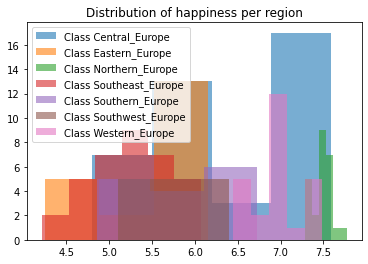

In [73]:
for region, happiness in happiness_by_region:
    plt.hist(happiness, label = "Class {}".format(region), alpha = 0.6, bins = "fd")
plt.title("Distribution of happiness per region")
plt.legend()
plt.show()

We can see something really interesting. It seems that the population in Central, Northern and Western Europe are happier than the other . But is this really true? We can't tell for sure. We can't be sure whether there's a significant difference or not.

Fortunately, there's a rigorous statistical method to find out. Enter hypothesis testing.

In [74]:
def get_multiple_groups(grouped_by_something, something_that_is_used_for_the_grouping:list):
    return pd.concat([group for (name, group) in grouped_by_something if name in something_that_is_used_for_the_grouping])

In [75]:
hipotethical_happier_regions = get_multiple_groups(happiness_by_region, ["Central_Europe","Northern_Europe","Western_Europe"])
rest_of_the_regions = get_multiple_groups(happiness_by_region, ["Eastern_Eurogroupedpe","Southern_Europe","Southeast_Europe","Southwest_Europe"])

The "null hypothesis",  𝐻0  says that "there's nothing interesting going on with the data". The "alternative hypothesis",  𝐻1  says the opposite.

We want to prove whether or not the the region is correlated with the happiness. Therefore:

𝐻0:  Region is not correlated with the happiness. <b>hipotethical_happier_regions</b> and <b>rest_of_the_regions</b> are two samples from the same distribution.
𝐻1:  <b>hipotethical_happier_regions</b> and <b>rest_of_the_regions</b> come from two different distributions.
Ideally, we'd like to reject the null hypothesis.

We have to agree on a "threshold value" of  𝑝 . Usually that's 5% (0.05). What does this mean? If we reject  𝐻0 , there will still be 5% chance that we rejected it wrongly.

<b>If  𝑝 ≤ 5% , we will reject  𝐻0 .</b>

In [76]:
def test_hypothesis(group1, group2, message_if_we_reject_H0:str):
    test_result = ttest_ind(group1, group2, equal_var = False)
    print(test_result.pvalue)

    if test_result.pvalue <= 0.05:
        print(message_if_we_reject_H0)
    else:
        print("There's not enough evidence to reject H0. Don't accept or reject anything else.")

In [77]:
test_hypothesis( hipotethical_happier_regions, rest_of_the_regions, "The differences in happiness score of the regions is significant. Reject H0.")

2.9778792392765427e-24
The differences in happiness score of the regions is significant. Reject H0.


Now we can test more hypothesis. For example let's check <b>if the region is correlated with the amount of consumed alcohol.</b>

In [78]:
alcohol_consumption_by_region = groupBy_and_separete( alcohol_consumption_AQValue_and_happiness_df, "Region","alcohol_consumption")

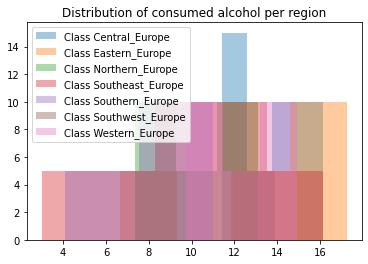

In [79]:
for region, amount_of_alcohol in alcohol_consumption_by_region:
    plt.hist(amount_of_alcohol, label = "Class {}".format(region), alpha = 0.4, bins = "fd")
plt.title("Distribution of consumed alcohol per region")
plt.legend()
plt.show()

From this histogram is hard to find something interesting, but we can suggest that people from South regions of Europe drinks more, so let's try it with hypotesis testing.

In [80]:
hypothetical_regions_with_more_consumption_of_alcohol = get_multiple_groups(alcohol_consumption_by_region, ["Southwest_Europe","Southeast_Europe","Southern_Europe"])
hypothetical_regions_with_less_alcohol_consumption = get_multiple_groups(alcohol_consumption_by_region, ["Central_Europe","Northern_Europe","Western_Europe","Eastern_Europe"])

We want to prove whether or not the the region is correlated with the alcohol consumption. Therefore:

𝐻0:  Region is not correlated with alcohol consumption. <b>hypothetical_regions_with_more_consumption_of_alcohol</b> and <b>hypothetical_regions_with_less_alcohol_consumption</b> are two samples from the same distribution.
𝐻1:  <b>hypothetical_regions_with_more_consumption_of_alcohol</b> and <b>hypothetical_regions_with_less_alcohol_consumption</b> come from two different distributions.
Ideally, we'd like to reject the null hypothesis.

We have to agree on a "threshold value" of  𝑝 . Usually that's 5% (0.05). What does this mean? If we reject  𝐻0 , there will still be 5% chance that we rejected it wrongly.

<b>If  𝑝 ≤ 5% , we will reject  𝐻0 .</b>

In [81]:
test_hypothesis(hypothetical_regions_with_more_consumption_of_alcohol, hypothetical_regions_with_less_alcohol_consumption, "The differences in alcohol consumption of the regions is significant. Reject H0.")

9.12675296105432e-06
The differences in alcohol consumption of the regions is significant. Reject H0.


<a id="12"></a>

We previosly said that we will test the correlation from the research <b>"According to the scientists of the research, wealth actually is correlated with happiness, particularly in poorer societies."</b> 

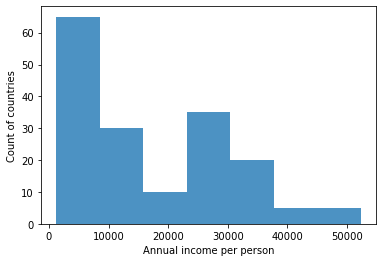

In [82]:
plt.hist(alcohol_consumption_AQValue_and_happiness_df.income_per_person, alpha = 0.8, bins = "fd")
plt.xlabel("Annual income per person")
plt.ylabel("Count of countries")
plt.show()

In [83]:
alcohol_consumption_AQValue_and_happiness_df.income_per_person.min(),alcohol_consumption_AQValue_and_happiness_df.income_per_person.max()

(1194.711433, 52301.58718)

In [84]:
np.median(alcohol_consumption_AQValue_and_happiness_df.income_per_person)

14445.869620000001

In [85]:
alcohol_consumption_AQValue_and_happiness_df.income_per_person.mean()

17248.983704882365

In [86]:
alcohol_consumption_AQValue_and_happiness_df.income_per_person.skew()

0.6061475123917012

I think the the fairer separator of the groups will be the mean value.

In [87]:
mean_value = alcohol_consumption_AQValue_and_happiness_df.income_per_person.mean()

In [88]:
first_group_of_countries = alcohol_consumption_AQValue_and_happiness_df[alcohol_consumption_AQValue_and_happiness_df.income_per_person < mean_value]
second_group_of_countries = alcohol_consumption_AQValue_and_happiness_df[alcohol_consumption_AQValue_and_happiness_df.income_per_person >= mean_value]

In [89]:
len(first_group_of_countries),len(second_group_of_countries)

(95, 75)

In [90]:
happiness_per_income = groupBy_and_separete( alcohol_consumption_AQValue_and_happiness_df, "income_per_person","Happiness Score")

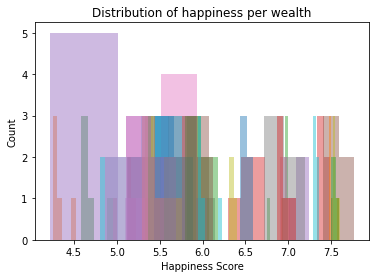

In [91]:
for income_per_person, happiness in happiness_per_income:
    plt.hist(happiness, alpha = 0.45, bins = "fd")
plt.title("Distribution of happiness per wealth")
plt.xlabel("Happiness Score")
plt.ylabel("Count")
plt.show()

In [92]:
hypothetical_countries_with_more_happiness = pd.concat([group for (name, group) in happiness_per_income if name > mean_value])
hypothetical_countries_with_less_happiness = pd.concat([group for (name, group) in happiness_per_income if name <= mean_value])

We want to prove whether or not the the happiness of the people is correlated with their wealth. Therefore:

𝐻0:  Happiness is not correlated with wealth. <b>hypothetical_countries_with_more_happiness</b> and <b>hypothetical_countries_with_less_happiness</b> are two samples from the same distribution.
𝐻1:  <b>hypothetical_countries_with_more_happiness</b> and <b>hypothetical_countries_with_less_happiness</b> come from two different distributions.
Ideally, we'd like to reject the null hypothesis.

We have to agree on a "threshold value" of  𝑝 . Usually that's 5% (0.05). What does this mean? If we reject  𝐻0 , there will still be 5% chance that we rejected it wrongly.

<b>If  𝑝 ≤ 5% , we will reject  𝐻0 .</b>

In [93]:
test_hypothesis( hypothetical_countries_with_more_happiness, hypothetical_countries_with_less_happiness, "The differences in happiness score compared to wealth is significant. Reject H0.")

2.0873388397522427e-48
The differences in happiness score compared to wealth is significant. Reject H0.


<a id="4"></a>

# 4.Conclusion

From this study we can conclude that the happiness of the people depends on many factors but in most cases the happiness of different regions are different, because of the lifestyle of the people, their habits and their wealth, while people in the same region has simillar values of the factors influencing the happiness.

### REFERENCES:
<ul>
    <li><a href="https://www.eea.europa.eu/">The European Environment Agency</a></li>
        <li><a href="https://www.psychologicalscience.org/observer/serious-research-on-happiness">Serious Research on Happiness</a></li>
            <li><a href="https://en.wikipedia.org/wiki/World_Happiness_Report">World Happiness Report</a></li>
    <li><a href="https://towardsdatascience.com/using-python-to-create-a-world-map-from-a-list-of-country-names-cd7480d03b10">Using Python to create a world map from a list of country names</a></li>
    <li><a href="https://www.kaggle.com/datasets">Source for Datasets -kaggle</a></li>
    <li><a href="https://softuni.bg/trainings/3283/data-science-june-2021">Data Science course - June 2021</a></li>
</ul>